<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Data Science Para Análise Multivariada de Dados</font>
## <font color='blue'>Projeto 1</font>
## <font color='blue'>Processo Completo de Análise Exploratória de Dados Multivariados</font>

### Instalando e Carregando Pacotes

https://pypi.org/project/missingno/

In [2]:
%pip install -q missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Imports
import sklearn
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Carregando os Dados

In [4]:
# Carrega o dataset
df_dsa = pd.read_csv("dataset.csv")

In [5]:
# Shape
df_dsa.shape

(2237, 25)

In [6]:
# Amostra dos dados
df_dsa.head()

ID   Ano_Nascimento   Educacao  Estado_Civil        Renda  \
0   9970             1977  Graduação        Casado  $55,375.00    
1   4002             1960        PhD        Casado  $77,037.00    
2  10914             1970  Graduação      Solteiro  $24,163.00    
3   7279             1969        PhD        Casado  $69,476.00    
4  10582             1979  Graduação        Casado  $72,063.00    

    Criancas_Em_Casa   Adolescentes_Em_Casa  Data_Cadastro_Cliente  \
0                  0                      1               10/17/13   
1                  0                      1               10/13/13   
2                  1                      1             2010-12-13   
3                  0                      0                9/30/13   
4                  0                      1             2007-03-13   

    Gasto_Vinhos   Gasto_Frutas  ...   Num_Compras_Web   Num_Compras_Catalogo  \
0             42             11  ...                 1                      1   
1            463             96  ...                 7                      7   
2              4              1  ...                 1                      0   
3            260             86  ...                 4                      6   
4            180             32  ...                 5                      2   

    Num_Compras_Loja   Num_Visitas_Web_Mes   Aceitou_Campanha_1  \
0                  6                     2                    0   
1                 12                     3                    0   
2                  3                     4                    0   
3                  4                     2                    0   
4                 12                     2                    0   

    Aceitou_Campanha_2   Aceitou_Campanha_3   Aceitou_Campanha_4  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

    Aceitou_Campanha_5   Aceitou_Campanha_6  
0                    0                    0  
1                    0                    0  
2                    0                    0  
3                    0                    0  
4                    0                    0  

[5 rows x 25 columns]

In [7]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         2237 non-null   int64 
 1    Ano_Nascimento            2237 non-null   int64 
 2    Educacao                  2237 non-null   object
 3    Estado_Civil              2237 non-null   object
 4    Renda                     2213 non-null   object
 5    Criancas_Em_Casa          2237 non-null   int64 
 6    Adolescentes_Em_Casa      2237 non-null   int64 
 7    Data_Cadastro_Cliente     2237 non-null   object
 8    Gasto_Vinhos              2237 non-null   int64 
 9    Gasto_Frutas              2237 non-null   int64 
 10   Gasto_Carnes              2237 non-null   int64 
 11   Gasto_Peixes              2237 non-null   int64 
 12   Gasto_Doces               2237 non-null   int64 
 13   Gasto_Outros              2237 non-null   int64 
 14   Num_Com

## Limpeza e Processamento Inicial dos Dados

In [8]:
# Vamos remover o espaço extra nos títulos das colunas
df_dsa.columns = df_dsa.columns.str.replace(' ', '') 

In [9]:
# A variável Renda tem o caracter $. Vamos remover esse caracter especial para ter a coluna como numérica
df_dsa['Renda'] = df_dsa['Renda'].str.replace('$', '').str.replace(',', '').astype(float) 

In [10]:
# A coluna de data está como tipo object. Vamos converter para o tipo datetime
df_dsa['Data_Cadastro_Cliente'] = pd.to_datetime(df_dsa['Data_Cadastro_Cliente']) 

In [ ]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2237 non-null   int64         
 1   Ano_Nascimento            2237 non-null   int64         
 2   Educacao                  2237 non-null   object        
 3   Estado_Civil              2237 non-null   object        
 4   Renda                     2213 non-null   float64       
 5   Criancas_Em_Casa          2237 non-null   int64         
 6   Adolescentes_Em_Casa      2237 non-null   int64         
 7   Data_Cadastro_Cliente     2237 non-null   datetime64[ns]
 8   Gasto_Vinhos              2237 non-null   int64         
 9   Gasto_Frutas              2237 non-null   int64         
 10  Gasto_Carnes              2237 non-null   int64         
 11  Gasto_Peixes              2237 non-null   int64         
 12  Gasto_Doces         

In [12]:
# Amostra dos dados
df_dsa.head()

ID  Ano_Nascimento   Educacao Estado_Civil    Renda  Criancas_Em_Casa  \
0   9970            1977  Graduação       Casado  55375.0                 0   
1   4002            1960        PhD       Casado  77037.0                 0   
2  10914            1970  Graduação     Solteiro  24163.0                 1   
3   7279            1969        PhD       Casado  69476.0                 0   
4  10582            1979  Graduação       Casado  72063.0                 0   

   Adolescentes_Em_Casa Data_Cadastro_Cliente  Gasto_Vinhos  Gasto_Frutas  \
0                     1            2013-10-17            42            11   
1                     1            2013-10-13           463            96   
2                     1            2010-12-13             4             1   
3                     0            2013-09-30           260            86   
4                     1            2007-03-13           180            32   

   ...  Num_Compras_Web  Num_Compras_Catalogo  Num_Compras_Loja  \
0  ...                1                     1                 6   
1  ...                7                     7                12   
2  ...                1                     0                 3   
3  ...                4                     6                 4   
4  ...                5                     2                12   

   Num_Visitas_Web_Mes  Aceitou_Campanha_1  Aceitou_Campanha_2  \
0                    2                   0                   0   
1                    3                   0                   0   
2                    4                   0                   0   
3                    2                   0                   0   
4                    2                   0                   0   

   Aceitou_Campanha_3  Aceitou_Campanha_4  Aceitou_Campanha_5  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Aceitou_Campanha_6  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 25 columns]

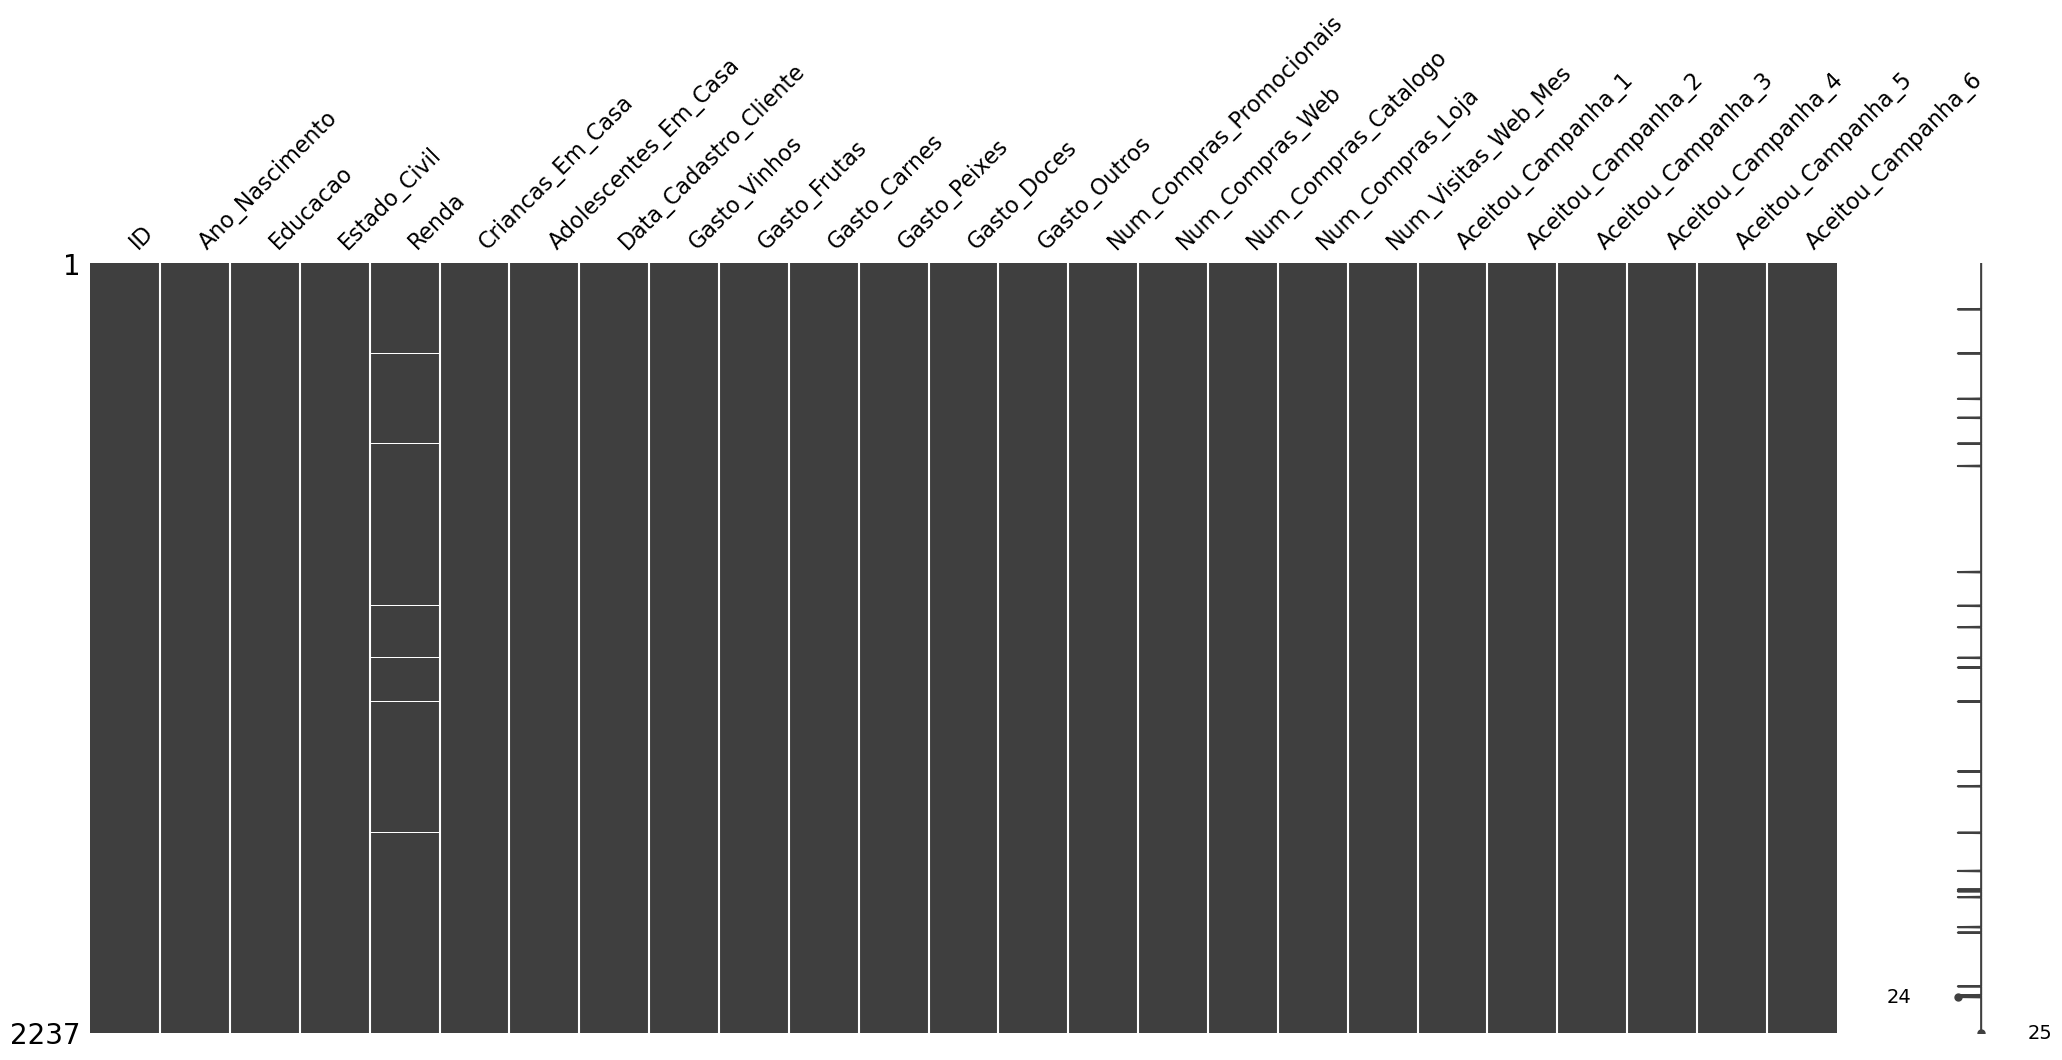

In [13]:
# Matriz de valores ausentes
msno.matrix(df_dsa)
plt.show()

In [14]:
# Soma de valores ausentes
valores_ausentes = df_dsa.isnull().sum().sort_values(ascending = False)

In [15]:
valores_ausentes

Renda                       24
ID                           0
Gasto_Outros                 0
Aceitou_Campanha_5           0
Aceitou_Campanha_4           0
Aceitou_Campanha_3           0
Aceitou_Campanha_2           0
Aceitou_Campanha_1           0
Num_Visitas_Web_Mes          0
Num_Compras_Loja             0
Num_Compras_Catalogo         0
Num_Compras_Web              0
Num_Compras_Promocionais     0
Gasto_Doces                  0
Ano_Nascimento               0
Gasto_Peixes                 0
Gasto_Carnes                 0
Gasto_Frutas                 0
Gasto_Vinhos                 0
Data_Cadastro_Cliente        0
Adolescentes_Em_Casa         0
Criancas_Em_Casa             0
Estado_Civil                 0
Educacao                     0
Aceitou_Campanha_6           0
dtype: int64

In [16]:
# Filtramos pelas que são diferentes de zero
print(valores_ausentes.loc[valores_ausentes != 0])

Renda    24
dtype: int64


Para tratar os valores ausentes primeiro devemos checar se há outliers na variável, o que ajudará a tomar a decisão ideal de tratamento dos valores ausentes.

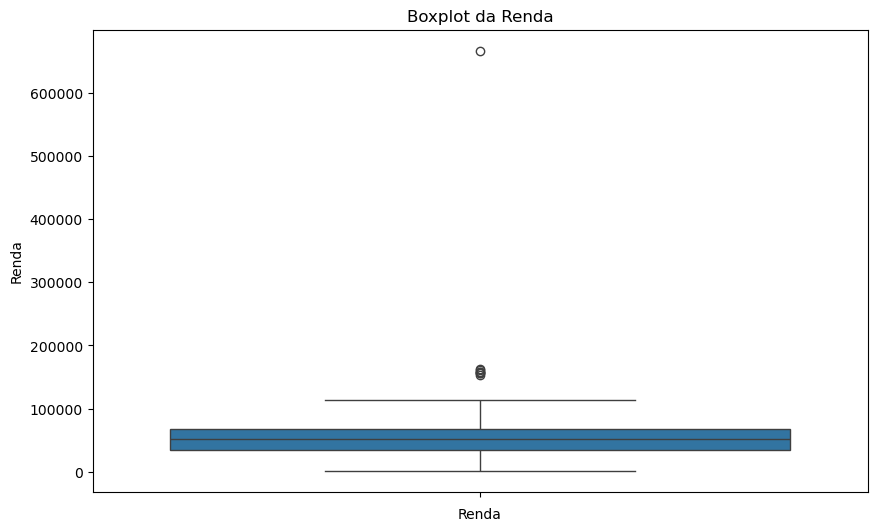

In [17]:
# Vamos usar um boxplot para visualizar se há outliers na coluna 'Renda'
plt.figure(figsize = (10, 6))
sns.boxplot(df_dsa['Renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

Sim, parece haver outliers. Vamos nos certificar usando a regra estatística.

In [18]:
# Calculando o IQR para a coluna 'Renda'
Q1 = df_dsa['Renda'].quantile(0.25)
Q3 = df_dsa['Renda'].quantile(0.75)
IQR = Q3 - Q1

In [19]:
# Definindo os limites para considerar um ponto como outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [20]:
# Identificando os outliers
outliers = df_dsa[(df_dsa['Renda'] < lower_bound) | (df_dsa['Renda'] > upper_bound)]
outliers

ID  Ano_Nascimento   Educacao Estado_Civil     Renda  \
325    4931            1977  Graduação       Casado  157146.0   
497    1501            1982        PhD       Casado  160803.0   
526    9432            1977  Graduação       Casado  666666.0   
730    1503            1976        PhD       Casado  162397.0   
851    5336            1971   Mestrado       Casado  157733.0   
1787   5555            1975  Graduação   Divorciado  153924.0   
1886  11181            1949        PhD       Casado  156924.0   
2165   8475            1973        PhD       Casado  157243.0   

      Criancas_Em_Casa  Adolescentes_Em_Casa Data_Cadastro_Cliente  \
325                  0                     0            2013-04-29   
497                  0                     0            2008-04-12   
526                  1                     0            2006-02-13   
730                  1                     1            2006-03-13   
851                  1                     0            2006-04-13   
1787                 0                     0            2002-07-14   
1886                 0                     0            2013-08-29   
2165                 0                     1            2003-01-14   

      Gasto_Vinhos  Gasto_Frutas  ...  Num_Compras_Web  Num_Compras_Catalogo  \
325              1             0  ...                0                    28   
497             55            16  ...                0                    28   
526              9            14  ...                3                     1   
730             85             1  ...                0                     0   
851             39             1  ...                1                     0   
1787             1             1  ...                0                     0   
1886             2             1  ...                0                     0   
2165            20             2  ...                0                    22   

      Num_Compras_Loja  Num_Visitas_Web_Mes  Aceitou_Campanha_1  \
325                  0                    1                   0   
497                  1                    0                   0   
526                  3                    6                   0   
730                  1                    1                   0   
851                  1                    1                   0   
1787                 0                    0                   0   
1886                 0                    0                   0   
2165                 0                    0                   0   

      Aceitou_Campanha_2  Aceitou_Campanha_3  Aceitou_Campanha_4  \
325                    0                   0                   0   
497                    0                   0                   0   
526                    0                   0                   0   
730                    0                   0                   0   
851                    0                   0                   0   
1787                   0                   0                   0   
1886                   0                   0                   0   
2165                   0                   0                   0   

      Aceitou_Campanha_5  Aceitou_Campanha_6  
325                    0                   0  
497                    0                   0  
526                    0                   0  
730                    0                   0  
851                    0                   0  
1787                   0                   0  
1886                   0                   0  
2165                   0                   0  

[8 rows x 25 columns]

Vamos checar a distribuição da variável.

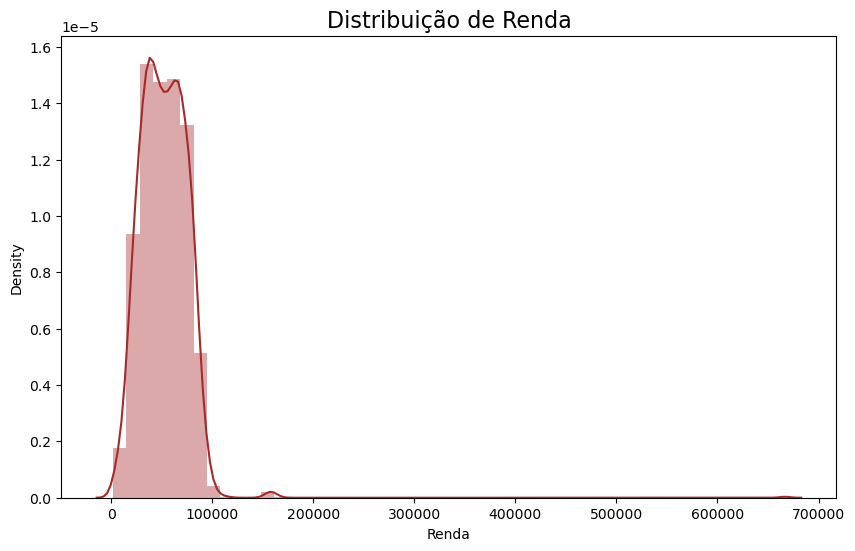

In [21]:
# Definindo o tamanho da figura
plt.figure(figsize = (10, 6)) 

# Criando o gráfico de distribuição
sns.distplot(df_dsa['Renda'], color = 'brown')  

# Definindo o título
plt.title('Distribuição de Renda', size = 16)  

# Exibindo o gráfico
plt.show()

Existem várias estratégias para tratar outliers em um conjunto de dados e a escolha da melhor abordagem depende do contexto específico e do objetivo da análise. Aqui estão algumas opções comuns:

**Remoção**: Simplesmente remover os outliers do conjunto de dados. Esta é uma abordagem direta, mas pode não ser ideal se o número de outliers for significativo ou se esses pontos contiverem informações importantes.

**Substituição**: Substituir os valores dos outliers por outros mais representativos, como a média ou mediana dos dados. Esta abordagem é útil se os outliers forem considerados erros de medição ou entrada de dados.

**Transformação**: Aplicar uma transformação aos dados pode reduzir o impacto dos outliers. Transformações comuns incluem logarítmica, raiz quadrada ou Box-Cox.

**Capping (Limitação)**: Definir um limite superior e/ou inferior para os valores dos dados. Valores além desses limites são trazidos para o limite mais próximo. Por exemplo, todos os valores acima do limite superior são definidos para esse limite.

**Análise Separada**: Às vezes, os outliers são mantidos no conjunto de dados e analisados separadamente para entender melhor suas características.

**Análise de Causa**: Investigar a causa dos outliers. Se eles são resultado de um fenômeno real, pode ser importante incluí-los na análise.

A escolha do método depende da natureza dos dados e do objetivo da análise. Em muitos casos, uma combinação dessas estratégias pode ser a mais eficaz. 

Vamos apenas remover os outliers pois são poucos registros.

In [22]:
# Filtrando o dataframe e removendo os outliers
df_dsa = df_dsa[(df_dsa['Renda'] >= lower_bound) & (df_dsa['Renda'] <= upper_bound)]

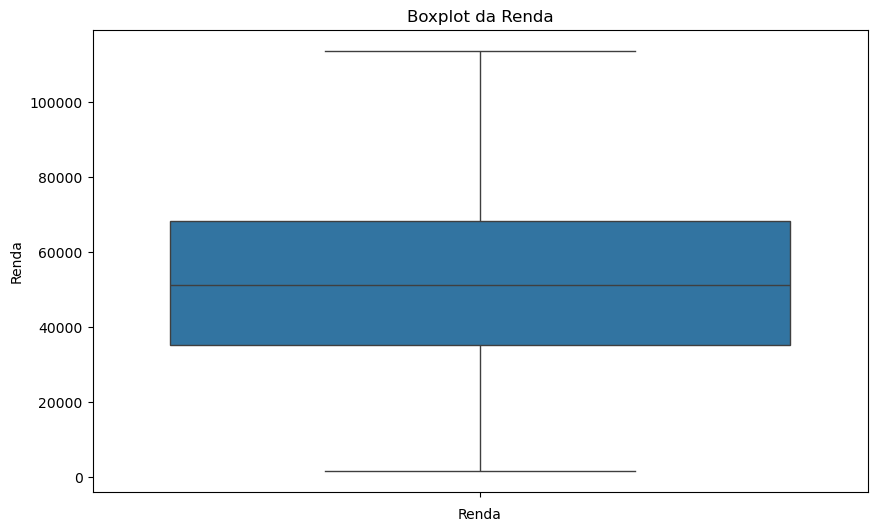

In [23]:
# Vamos usar um boxplot para visualizar se há outliers na coluna 'Renda'
plt.figure(figsize = (10, 6))
sns.boxplot(df_dsa['Renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

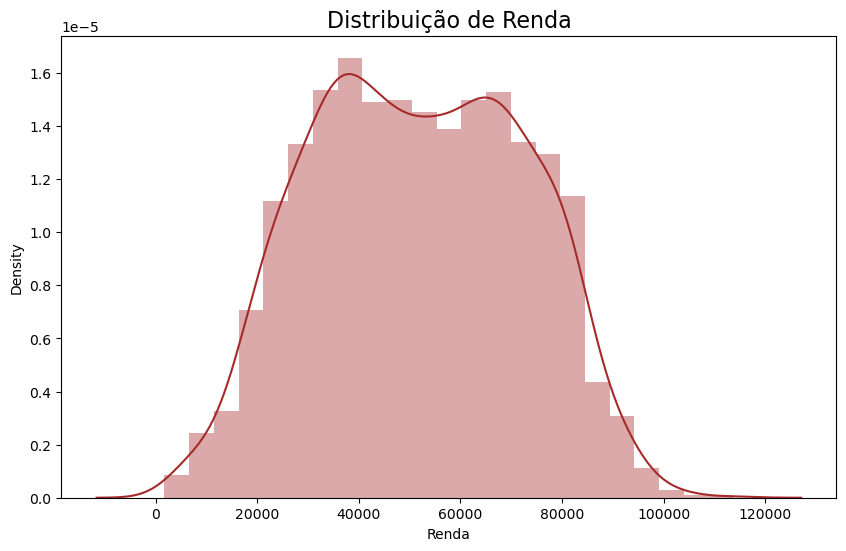

In [24]:
# Definindo o tamanho da figura
plt.figure(figsize = (10, 6)) 

# Criando o gráfico de distribuição
sns.distplot(df_dsa['Renda'], color = 'brown')  

# Definindo o título
plt.title('Distribuição de Renda', size = 16)  

# Exibindo o gráfico
plt.show()

Agora tratamos os valores ausentes.

In [25]:
# Normaliza os dados antes de aplicar o KNNImputer (opcional, mas recomendado)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_dsa[['Renda']])

In [26]:
# Cria o KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [27]:
# Imputa os valores ausentes com o imputer
data_imputed = imputer.fit_transform(data_scaled)

In [28]:
# Converter de volta para o formato original 
df_dsa['Renda'] = scaler.inverse_transform(data_imputed)

In [29]:
print('Total de Valores Ausentes:', df_dsa.isnull().sum().sum())

Total de Valores Ausentes: 0


In [30]:
df_dsa.head()

ID  Ano_Nascimento   Educacao Estado_Civil    Renda  Criancas_Em_Casa  \
0   9970            1977  Graduação       Casado  55375.0                 0   
1   4002            1960        PhD       Casado  77037.0                 0   
2  10914            1970  Graduação     Solteiro  24163.0                 1   
3   7279            1969        PhD       Casado  69476.0                 0   
4  10582            1979  Graduação       Casado  72063.0                 0   

   Adolescentes_Em_Casa Data_Cadastro_Cliente  Gasto_Vinhos  Gasto_Frutas  \
0                     1            2013-10-17            42            11   
1                     1            2013-10-13           463            96   
2                     1            2010-12-13             4             1   
3                     0            2013-09-30           260            86   
4                     1            2007-03-13           180            32   

   ...  Num_Compras_Web  Num_Compras_Catalogo  Num_Compras_Loja  \
0  ...                1                     1                 6   
1  ...                7                     7                12   
2  ...                1                     0                 3   
3  ...                4                     6                 4   
4  ...                5                     2                12   

   Num_Visitas_Web_Mes  Aceitou_Campanha_1  Aceitou_Campanha_2  \
0                    2                   0                   0   
1                    3                   0                   0   
2                    4                   0                   0   
3                    2                   0                   0   
4                    2                   0                   0   

   Aceitou_Campanha_3  Aceitou_Campanha_4  Aceitou_Campanha_5  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Aceitou_Campanha_6  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 25 columns]

## Análise Exploratória e Engenharia de Atributos

In [31]:
# Colunas
df_dsa.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6'],
      dtype='object')

In [32]:
# Drop (em memória) das colunas categóricas para criar o box plot das colunas quantitativas
data_boxplot = df_dsa.drop(columns = ['ID',
                                      'Educacao',
                                      'Estado_Civil',
                                      'Criancas_Em_Casa',
                                      'Data_Cadastro_Cliente',
                                      'Adolescentes_Em_Casa', 
                                      'Aceitou_Campanha_1', 
                                      'Aceitou_Campanha_2',
                                      'Aceitou_Campanha_3', 
                                      'Aceitou_Campanha_4', 
                                      'Aceitou_Campanha_5',
                                      'Aceitou_Campanha_6'])

In [33]:
data_boxplot.columns

Index(['Ano_Nascimento', 'Renda', 'Gasto_Vinhos', 'Gasto_Frutas',
       'Gasto_Carnes', 'Gasto_Peixes', 'Gasto_Doces', 'Gasto_Outros',
       'Num_Compras_Promocionais', 'Num_Compras_Web', 'Num_Compras_Catalogo',
       'Num_Compras_Loja', 'Num_Visitas_Web_Mes'],
      dtype='object')

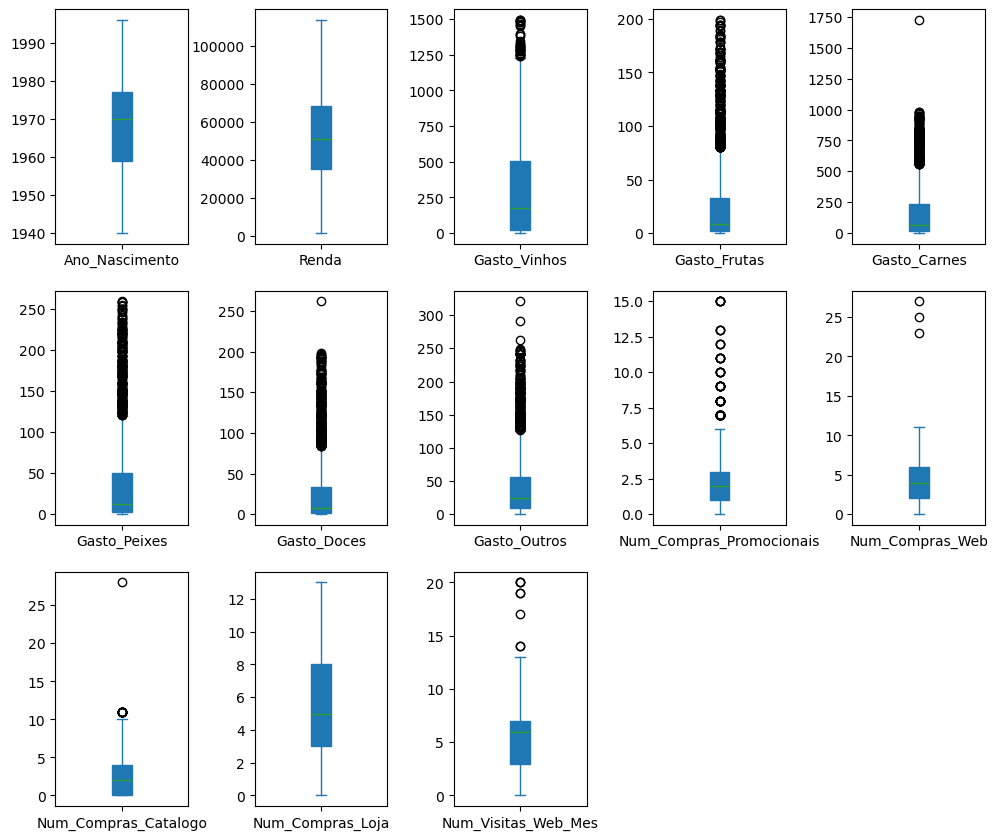

In [34]:
# Plot
data_boxplot.plot(subplots = True, layout = (4,5), kind = 'box', figsize = (12,14), patch_artist = True)
plt.subplots_adjust(wspace=0.5);

> Vamos transformar algumas variáveis, criar novas e combinar outras em um trabalho de engenharia de atributos que vai nos ajudar na exploração dos dados.

In [35]:
# Vamos criar uma nova coluna com a idade de cada cliente (ano atual - ano de nascimento)
ano_atual = datetime.now().year
df_dsa['Idade'] = ano_atual - df_dsa['Ano_Nascimento']

In [36]:
df_dsa.head()

ID  Ano_Nascimento   Educacao Estado_Civil    Renda  Criancas_Em_Casa  \
0   9970            1977  Graduação       Casado  55375.0                 0   
1   4002            1960        PhD       Casado  77037.0                 0   
2  10914            1970  Graduação     Solteiro  24163.0                 1   
3   7279            1969        PhD       Casado  69476.0                 0   
4  10582            1979  Graduação       Casado  72063.0                 0   

   Adolescentes_Em_Casa Data_Cadastro_Cliente  Gasto_Vinhos  Gasto_Frutas  \
0                     1            2013-10-17            42            11   
1                     1            2013-10-13           463            96   
2                     1            2010-12-13             4             1   
3                     0            2013-09-30           260            86   
4                     1            2007-03-13           180            32   

   ...  Num_Compras_Catalogo  Num_Compras_Loja  Num_Visitas_Web_Mes  \
0  ...                     1                 6                    2   
1  ...                     7                12                    3   
2  ...                     0                 3                    4   
3  ...                     6                 4                    2   
4  ...                     2                12                    2   

   Aceitou_Campanha_1  Aceitou_Campanha_2  Aceitou_Campanha_3  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Aceitou_Campanha_4  Aceitou_Campanha_5  Aceitou_Campanha_6  Idade  
0                   0                   0                   0     47  
1                   0                   0                   0     64  
2                   0                   0                   0     54  
3                   0                   0                   0     55  
4                   0                   0                   0     45  

[5 rows x 26 columns]

In [37]:
# Criaremos uma coluna com o número de dias como cliente desde a data de cadastro
df_dsa['Dias_Como_Cliente'] = df_dsa['Data_Cadastro_Cliente'].max() - df_dsa['Data_Cadastro_Cliente']

In [38]:
df_dsa.head()

ID  Ano_Nascimento   Educacao Estado_Civil    Renda  Criancas_Em_Casa  \
0   9970            1977  Graduação       Casado  55375.0                 0   
1   4002            1960        PhD       Casado  77037.0                 0   
2  10914            1970  Graduação     Solteiro  24163.0                 1   
3   7279            1969        PhD       Casado  69476.0                 0   
4  10582            1979  Graduação       Casado  72063.0                 0   

   Adolescentes_Em_Casa Data_Cadastro_Cliente  Gasto_Vinhos  Gasto_Frutas  \
0                     1            2013-10-17            42            11   
1                     1            2013-10-13           463            96   
2                     1            2010-12-13             4             1   
3                     0            2013-09-30           260            86   
4                     1            2007-03-13           180            32   

   ...  Num_Compras_Loja  Num_Visitas_Web_Mes  Aceitou_Campanha_1  \
0  ...                 6                    2                   0   
1  ...                12                    3                   0   
2  ...                 3                    4                   0   
3  ...                 4                    2                   0   
4  ...                12                    2                   0   

   Aceitou_Campanha_2  Aceitou_Campanha_3  Aceitou_Campanha_4  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Aceitou_Campanha_5  Aceitou_Campanha_6  Idade  Dias_Como_Cliente  
0                   0                   0     47           255 days  
1                   0                   0     64           259 days  
2                   0                   0     54          1294 days  
3                   0                   0     55           272 days  
4                   0                   0     45          2665 days  

[5 rows x 27 columns]

In [39]:
# Removeremos a palavra "days" ao final do valor de cada linha da coluna Dias_Como_Cliente
df_dsa['Dias_Como_Cliente'] = df_dsa['Dias_Como_Cliente'].astype(str).str.replace(' days', '')

In [40]:
df_dsa.head()

ID  Ano_Nascimento   Educacao Estado_Civil    Renda  Criancas_Em_Casa  \
0   9970            1977  Graduação       Casado  55375.0                 0   
1   4002            1960        PhD       Casado  77037.0                 0   
2  10914            1970  Graduação     Solteiro  24163.0                 1   
3   7279            1969        PhD       Casado  69476.0                 0   
4  10582            1979  Graduação       Casado  72063.0                 0   

   Adolescentes_Em_Casa Data_Cadastro_Cliente  Gasto_Vinhos  Gasto_Frutas  \
0                     1            2013-10-17            42            11   
1                     1            2013-10-13           463            96   
2                     1            2010-12-13             4             1   
3                     0            2013-09-30           260            86   
4                     1            2007-03-13           180            32   

   ...  Num_Compras_Loja  Num_Visitas_Web_Mes  Aceitou_Campanha_1  \
0  ...                 6                    2                   0   
1  ...                12                    3                   0   
2  ...                 3                    4                   0   
3  ...                 4                    2                   0   
4  ...                12                    2                   0   

   Aceitou_Campanha_2  Aceitou_Campanha_3  Aceitou_Campanha_4  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Aceitou_Campanha_5  Aceitou_Campanha_6  Idade  Dias_Como_Cliente  
0                   0                   0     47                255  
1                   0                   0     64                259  
2                   0                   0     54               1294  
3                   0                   0     55                272  
4                   0                   0     45               2665  

[5 rows x 27 columns]

In [41]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2205 non-null   int64         
 1   Ano_Nascimento            2205 non-null   int64         
 2   Educacao                  2205 non-null   object        
 3   Estado_Civil              2205 non-null   object        
 4   Renda                     2205 non-null   float64       
 5   Criancas_Em_Casa          2205 non-null   int64         
 6   Adolescentes_Em_Casa      2205 non-null   int64         
 7   Data_Cadastro_Cliente     2205 non-null   datetime64[ns]
 8   Gasto_Vinhos              2205 non-null   int64         
 9   Gasto_Frutas              2205 non-null   int64         
 10  Gasto_Carnes              2205 non-null   int64         
 11  Gasto_Peixes              2205 non-null   int64         
 12  Gasto_Doces              

In [42]:
# Ajusta o tipo de dado da variável Dias_Como_Cliente
df_dsa['Dias_Como_Cliente'] = pd.to_numeric(df_dsa['Dias_Como_Cliente'], downcast = 'integer')

In [43]:
df_dsa.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Idade', 'Dias_Como_Cliente'],
      dtype='object')

In [44]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2205 non-null   int64         
 1   Ano_Nascimento            2205 non-null   int64         
 2   Educacao                  2205 non-null   object        
 3   Estado_Civil              2205 non-null   object        
 4   Renda                     2205 non-null   float64       
 5   Criancas_Em_Casa          2205 non-null   int64         
 6   Adolescentes_Em_Casa      2205 non-null   int64         
 7   Data_Cadastro_Cliente     2205 non-null   datetime64[ns]
 8   Gasto_Vinhos              2205 non-null   int64         
 9   Gasto_Frutas              2205 non-null   int64         
 10  Gasto_Carnes              2205 non-null   int64         
 11  Gasto_Peixes              2205 non-null   int64         
 12  Gasto_Doces              

In [45]:
# Cria uma variável com o Total de Compras realizadas nos 3 diferentes canais
df_dsa['TotalCompras'] = df_dsa['Num_Compras_Web'] + df_dsa['Num_Compras_Catalogo'] + df_dsa['Num_Compras_Loja']

In [46]:
df_dsa.head()

ID  Ano_Nascimento   Educacao Estado_Civil    Renda  Criancas_Em_Casa  \
0   9970            1977  Graduação       Casado  55375.0                 0   
1   4002            1960        PhD       Casado  77037.0                 0   
2  10914            1970  Graduação     Solteiro  24163.0                 1   
3   7279            1969        PhD       Casado  69476.0                 0   
4  10582            1979  Graduação       Casado  72063.0                 0   

   Adolescentes_Em_Casa Data_Cadastro_Cliente  Gasto_Vinhos  Gasto_Frutas  \
0                     1            2013-10-17            42            11   
1                     1            2013-10-13           463            96   
2                     1            2010-12-13             4             1   
3                     0            2013-09-30           260            86   
4                     1            2007-03-13           180            32   

   ...  Num_Visitas_Web_Mes  Aceitou_Campanha_1  Aceitou_Campanha_2  \
0  ...                    2                   0                   0   
1  ...                    3                   0                   0   
2  ...                    4                   0                   0   
3  ...                    2                   0                   0   
4  ...                    2                   0                   0   

   Aceitou_Campanha_3  Aceitou_Campanha_4  Aceitou_Campanha_5  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Aceitou_Campanha_6  Idade  Dias_Como_Cliente  TotalCompras  
0                   0     47                255             8  
1                   0     64                259            26  
2                   0     54               1294             4  
3                   0     55                272            14  
4                   0     45               2665            19  

[5 rows x 28 columns]

In [47]:
df_dsa.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Idade', 'Dias_Como_Cliente', 'TotalCompras'],
      dtype='object')

In [48]:
# Cria a variável Gasto_Total com o somatório de todas as colunas que começam com o nome Gasto
df_dsa['Gasto_Total'] = df_dsa.filter(like = 'Gasto').sum(axis=1)

In [49]:
df_dsa.head()

ID  Ano_Nascimento   Educacao Estado_Civil    Renda  Criancas_Em_Casa  \
0   9970            1977  Graduação       Casado  55375.0                 0   
1   4002            1960        PhD       Casado  77037.0                 0   
2  10914            1970  Graduação     Solteiro  24163.0                 1   
3   7279            1969        PhD       Casado  69476.0                 0   
4  10582            1979  Graduação       Casado  72063.0                 0   

   Adolescentes_Em_Casa Data_Cadastro_Cliente  Gasto_Vinhos  Gasto_Frutas  \
0                     1            2013-10-17            42            11   
1                     1            2013-10-13           463            96   
2                     1            2010-12-13             4             1   
3                     0            2013-09-30           260            86   
4                     1            2007-03-13           180            32   

   ...  Aceitou_Campanha_1  Aceitou_Campanha_2  Aceitou_Campanha_3  \
0  ...                   0                   0                   0   
1  ...                   0                   0                   0   
2  ...                   0                   0                   0   
3  ...                   0                   0                   0   
4  ...                   0                   0                   0   

   Aceitou_Campanha_4  Aceitou_Campanha_5  Aceitou_Campanha_6  Idade  \
0                   0                   0                   0     47   
1                   0                   0                   0     64   
2                   0                   0                   0     54   
3                   0                   0                   0     55   
4                   0                   0                   0     45   

   Dias_Como_Cliente  TotalCompras  Gasto_Total  
0                255             8          162  
1                259            26         1123  
2               1294             4           17  
3                272            14         1044  
4               2665            19          758  

[5 rows x 29 columns]

In [50]:
df_dsa.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Idade', 'Dias_Como_Cliente', 'TotalCompras',
       'Gasto_Total'],
      dtype='object')

In [51]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2205 non-null   int64         
 1   Ano_Nascimento            2205 non-null   int64         
 2   Educacao                  2205 non-null   object        
 3   Estado_Civil              2205 non-null   object        
 4   Renda                     2205 non-null   float64       
 5   Criancas_Em_Casa          2205 non-null   int64         
 6   Adolescentes_Em_Casa      2205 non-null   int64         
 7   Data_Cadastro_Cliente     2205 non-null   datetime64[ns]
 8   Gasto_Vinhos              2205 non-null   int64         
 9   Gasto_Frutas              2205 non-null   int64         
 10  Gasto_Carnes              2205 non-null   int64         
 11  Gasto_Peixes              2205 non-null   int64         
 12  Gasto_Doces              

In [52]:
df_dsa['Aceitou_Campanha_1'].value_counts()

Aceitou_Campanha_1
0    2042
1     163
Name: count, dtype: int64

In [53]:
df_dsa['Aceitou_Campanha_2'].value_counts()

Aceitou_Campanha_2
0    2041
1     164
Name: count, dtype: int64

In [54]:
# Criaremos a variável para indicar se o cliente aceitou qualquer campanha (e comprou o produto ofertado)
df_dsa['aceite_campanha'] = df_dsa.filter(like = 'Aceitou').sum(axis = 1)

In [55]:
df_dsa.head()

ID  Ano_Nascimento   Educacao Estado_Civil    Renda  Criancas_Em_Casa  \
0   9970            1977  Graduação       Casado  55375.0                 0   
1   4002            1960        PhD       Casado  77037.0                 0   
2  10914            1970  Graduação     Solteiro  24163.0                 1   
3   7279            1969        PhD       Casado  69476.0                 0   
4  10582            1979  Graduação       Casado  72063.0                 0   

   Adolescentes_Em_Casa Data_Cadastro_Cliente  Gasto_Vinhos  Gasto_Frutas  \
0                     1            2013-10-17            42            11   
1                     1            2013-10-13           463            96   
2                     1            2010-12-13             4             1   
3                     0            2013-09-30           260            86   
4                     1            2007-03-13           180            32   

   ...  Aceitou_Campanha_2  Aceitou_Campanha_3  Aceitou_Campanha_4  \
0  ...                   0                   0                   0   
1  ...                   0                   0                   0   
2  ...                   0                   0                   0   
3  ...                   0                   0                   0   
4  ...                   0                   0                   0   

   Aceitou_Campanha_5  Aceitou_Campanha_6  Idade  Dias_Como_Cliente  \
0                   0                   0     47                255   
1                   0                   0     64                259   
2                   0                   0     54               1294   
3                   0                   0     55                272   
4                   0                   0     45               2665   

   TotalCompras  Gasto_Total  aceite_campanha  
0             8          162                0  
1            26         1123                0  
2             4           17                0  
3            14         1044                0  
4            19          758                0  

[5 rows x 30 columns]

In [56]:
df_dsa.sample(10)

ID  Ano_Nascimento            Educacao Estado_Civil    Renda  \
1700   4037            1976           Graduação   Divorciado  31859.0   
672    4137            1948           Graduação       Casado  70666.0   
531    1802            1971           Graduação       Casado  64795.0   
1985   5558            1954                 PhD     Solteiro  90933.0   
1277   3560            1952           Graduação       Casado  83844.0   
1884   6049            1982            Mestrado       Casado  73450.0   
2152   9925            1981                 PhD       Casado  39665.0   
981   10212            1986            Mestrado       Casado  42386.0   
1001   1204            1970                 PhD       Casado  67536.0   
1914   8700            1986  Ensino Fundamental     Solteiro  14906.0   

      Criancas_Em_Casa  Adolescentes_Em_Casa Data_Cadastro_Cliente  \
1700                 1                     0            2013-06-14   
672                  0                     0            2012-06-13   
531                  0                     1            2013-01-17   
1985                 0                     0            2014-03-31   
1277                 0                     0            2005-12-13   
1884                 0                     0            2012-05-13   
2152                 1                     0            2013-05-25   
981                  1                     0            2013-01-13   
1001                 0                     1            2013-05-22   
1914                 0                     0            2012-12-22   

      Gasto_Vinhos  Gasto_Frutas  ...  Aceitou_Campanha_2  Aceitou_Campanha_3  \
1700             3             1  ...                   0                   0   
672            398            40  ...                   0                   0   
531            412             5  ...                   0                   0   
1985          1020            31  ...                   0                   1   
1277           901            31  ...                   0                   1   
1884          1142            51  ...                   0                   0   
2152           127             1  ...                   0                   0   
981             65             4  ...                   0                   0   
1001          1253             0  ...                   0                   0   
1914             7             7  ...                   0                   0   

      Aceitou_Campanha_4  Aceitou_Campanha_5  Aceitou_Campanha_6  Idade  \
1700                   0                   0                   0     48   
672                    0                   0                   0     76   
531                    0                   0                   0     53   
1985                   0                   0                   0     70   
1277                   0                   0                   0     72   
1884                   1                   0                   0     42   
2152                   0                   0                   0     43   
981                    0                   0                   0     38   
1001                   1                   0                   0     54   
1914                   0                   0                   0     38   

      Dias_Como_Cliente  TotalCompras  Gasto_Total  aceite_campanha  
1700                380             3           20                0  
672                 746            15         1076                0  
531                 528            18          680                0  
1985                 90            14         1685                1  
1277               3120            19         1574                1  
1884                777            26         1804                2  
2152                400             9          216                1  
981                 532             6          100                0  
1001                403            27         1829                1  
1914            

In [57]:
# Vamos ajustar o tipo de dado e colocar em uma nova coluna
df_dsa['RespostaCampanha'] = df_dsa['aceite_campanha'].apply(lambda x: 'Aceitou' if x > 0 else 'Não Aceitou')

In [58]:
df_dsa.head()

ID  Ano_Nascimento   Educacao Estado_Civil    Renda  Criancas_Em_Casa  \
0   9970            1977  Graduação       Casado  55375.0                 0   
1   4002            1960        PhD       Casado  77037.0                 0   
2  10914            1970  Graduação     Solteiro  24163.0                 1   
3   7279            1969        PhD       Casado  69476.0                 0   
4  10582            1979  Graduação       Casado  72063.0                 0   

   Adolescentes_Em_Casa Data_Cadastro_Cliente  Gasto_Vinhos  Gasto_Frutas  \
0                     1            2013-10-17            42            11   
1                     1            2013-10-13           463            96   
2                     1            2010-12-13             4             1   
3                     0            2013-09-30           260            86   
4                     1            2007-03-13           180            32   

   ...  Aceitou_Campanha_3  Aceitou_Campanha_4  Aceitou_Campanha_5  \
0  ...                   0                   0                   0   
1  ...                   0                   0                   0   
2  ...                   0                   0                   0   
3  ...                   0                   0                   0   
4  ...                   0                   0                   0   

   Aceitou_Campanha_6  Idade  Dias_Como_Cliente  TotalCompras  Gasto_Total  \
0                   0     47                255             8          162   
1                   0     64                259            26         1123   
2                   0     54               1294             4           17   
3                   0     55                272            14         1044   
4                   0     45               2665            19          758   

   aceite_campanha  RespostaCampanha  
0                0       Não Aceitou  
1                0       Não Aceitou  
2                0       Não Aceitou  
3                0       Não Aceitou  
4                0       Não Aceitou  

[5 rows x 31 columns]

In [59]:
df_dsa.sample(10)

ID  Ano_Nascimento      Educacao Estado_Civil    Renda  \
2091   4786            1977     Graduação       Casado  75330.0   
2101   5623            1980      Mestrado       Casado  31535.0   
1304   5186            1955           PhD       Casado  58482.0   
1661   3179            1980     Graduação     Solteiro  81741.0   
1370   6024            1953     Graduação       Casado  94384.0   
279    1388            1975     Graduação     Solteiro  33249.0   
1526   8858            1972           PhD       Casado  44325.0   
79     5740            1970  Ensino Médio   Divorciado  25959.0   
954   10856            1980  Ensino Médio     Solteiro  45889.0   
1223    531            1954           PhD   Divorciado  57333.0   

      Criancas_Em_Casa  Adolescentes_Em_Casa Data_Cadastro_Cliente  \
2091                 1                     1            2010-04-12   
2101                 1                     0            2013-09-26   
1304                 0                     1            2003-12-14   
1661                 0                     0            2013-06-16   
1370                 0                     0            2003-04-13   
279                  1                     0            2013-02-20   
1526                 0                     1            2003-07-13   
79                   1                     1            2013-02-14   
954                  0                     1            2007-02-13   
1223                 0                     1            2012-09-22   

      Gasto_Vinhos  Gasto_Frutas  ...  Aceitou_Campanha_3  Aceitou_Campanha_4  \
2091           555            82  ...                   0                   0   
2101            15             4  ...                   0                   0   
1304           576             7  ...                   0                   0   
1661           249           153  ...                   0                   0   
1370          1111            24  ...                   1                   1   
279              6            10  ...                   0                   0   
1526           516             0  ...                   0                   0   
79               4             2  ...                   0                   0   
954             31             0  ...                   0                   0   
1223           941            14  ...                   0                   0   

      Aceitou_Campanha_5  Aceitou_Campanha_6  Idade  Dias_Como_Cliente  \
2091                   0                   0     47               1539   
2101                   0                   0     44                276   
1304                   0                   0     69               3850   
1661                   0                   0     44                378   
1370                   0                   1     71               4095   
279                    0                   0     49                494   
1526                   0                   0     52               4004   
79                     0                   1     54                500   
954                    0                   0     44               2693   
1223                   0                   1     70                645   

      TotalCompras  Gasto_Total  aceite_campanha  RespostaCampanha  
2091            25         1109                0       Não Aceitou  
2101             4           51                1           Aceitou  
1304            20          731                1           Aceitou  
1661            19         1572                0       Não Aceitou  
1370            18         2302                4           Aceitou  
279              6          112                0       Não Aceitou  
1526            17          542                1           Aceitou  
79               5           56                1           Aceitou  
954              4           46                0       Não Aceitou  
1223            22         1662                1           Aceitou  

[10 rows x 31 columns]

In [60]:
# Vamos observar uma amostra aleatória das variáveis que criamos
df_dsa[['Idade', 'Dias_Como_Cliente', 'TotalCompras', 'Gasto_Total', 'RespostaCampanha']].sample(10)

Idade  Dias_Como_Cliente  TotalCompras  Gasto_Total RespostaCampanha
1019     63               1204            18          636      Não Aceitou
369      50                649             6          101          Aceitou
203      53               4915            12          318          Aceitou
1662     53                404             4           34          Aceitou
1309     52                335             6          102      Não Aceitou
1937     68                494            19          685          Aceitou
1750     59                501            15         1947      Não Aceitou
76       69                456            32         1485          Aceitou
1160     77                593            16         1105      Não Aceitou
1551     74                 77             6           67      Não Aceitou

In [61]:
# Não precisamos mais destas variáveis
df_dsa.drop(['Ano_Nascimento', 'Data_Cadastro_Cliente', 'aceite_campanha'], axis = 1, inplace = True)

In [62]:
df_dsa.head()

ID   Educacao Estado_Civil    Renda  Criancas_Em_Casa  \
0   9970  Graduação       Casado  55375.0                 0   
1   4002        PhD       Casado  77037.0                 0   
2  10914  Graduação     Solteiro  24163.0                 1   
3   7279        PhD       Casado  69476.0                 0   
4  10582  Graduação       Casado  72063.0                 0   

   Adolescentes_Em_Casa  Gasto_Vinhos  Gasto_Frutas  Gasto_Carnes  \
0                     1            42            11            57   
1                     1           463            96           333   
2                     1             4             1             7   
3                     0           260            86           559   
4                     1           180            32           348   

   Gasto_Peixes  ...  Aceitou_Campanha_2  Aceitou_Campanha_3  \
0            10  ...                   0                   0   
1           168  ...                   0                   0   
2             2  ...                   0                   0   
3            63  ...                   0                   0   
4            76  ...                   0                   0   

   Aceitou_Campanha_4  Aceitou_Campanha_5  Aceitou_Campanha_6  Idade  \
0                   0                   0                   0     47   
1                   0                   0                   0     64   
2                   0                   0                   0     54   
3                   0                   0                   0     55   
4                   0                   0                   0     45   

   Dias_Como_Cliente  TotalCompras  Gasto_Total  RespostaCampanha  
0                255             8          162       Não Aceitou  
1                259            26         1123       Não Aceitou  
2               1294             4           17       Não Aceitou  
3                272            14         1044       Não Aceitou  
4               2665            19          758       Não Aceitou  

[5 rows x 28 columns]

In [63]:
df_dsa.describe()

ID          Renda  Criancas_Em_Casa  Adolescentes_Em_Casa  \
count   2205.000000    2205.000000       2205.000000           2205.000000   
mean    5585.439456   51622.094785          0.442177              0.506576   
std     3247.546423   20713.063826          0.537132              0.544380   
min        0.000000    1730.000000          0.000000              0.000000   
25%     2815.000000   35196.000000          0.000000              0.000000   
50%     5455.000000   51287.000000          0.000000              0.000000   
75%     8418.000000   68281.000000          1.000000              1.000000   
max    11191.000000  113734.000000          2.000000              2.000000   

       Gasto_Vinhos  Gasto_Frutas  Gasto_Carnes  Gasto_Peixes  Gasto_Doces  \
count   2205.000000   2205.000000   2205.000000   2205.000000  2205.000000   
mean     306.164626     26.403175    165.312018     37.756463    27.128345   
std      337.493839     39.784484    217.784507     54.824635    41.130468   
min        0.000000      0.000000      0.000000      0.000000     0.000000   
25%       24.000000      2.000000     16.000000      3.000000     1.000000   
50%      178.000000      8.000000     68.000000     12.000000     8.000000   
75%      507.000000     33.000000    232.000000     50.000000    34.000000   
max     1493.000000    199.000000   1725.000000    259.000000   262.000000   

       Gasto_Outros  ...  Aceitou_Campanha_1  Aceitou_Campanha_2  \
count   2205.000000  ...         2205.000000         2205.000000   
mean      44.057143  ...            0.073923            0.074376   
std       51.736211  ...            0.261705            0.262442   
min        0.000000  ...            0.000000            0.000000   
25%        9.000000  ...            0.000000            0.000000   
50%       25.000000  ...            0.000000            0.000000   
75%       56.000000  ...            0.000000            0.000000   
max      321.000000  ...            1.000000            1.000000   

       Aceitou_Campanha_3  Aceitou_Campanha_4  Aceitou_Campanha_5  \
count         2205.000000         2205.000000         2205.000000   
mean             0.073016            0.064399            0.013605   
std              0.260222            0.245518            0.115872   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Aceitou_Campanha_6        Idade  Dias_Como_Cliente  TotalCompras  \
count          2205.00000  2205.000000        2205.000000   2205.000000   
mean              0.15102    55.095692        1307.092971     12.569615   
std               0.35815    11.705801        1429.824606      7.180350   
min               0.00000    28.000000           0.000000      0.000000   
25%               0.00000    47.000000         286.000000      6.000000   
50%               0.00000    54.000000         583.000000     12.000000   
75%               0.00000    65.000000        2116.000000     18.000000   
max               1.00000    84.000000        4915.000000     32.000000   

       Gasto_Total  
count  2205.000000  
mean    606.821769  
std     601.675284  
min       5.000000  
25%      69.000000  
50%     397.000000  
75%    1047.000000  
max    2525.000000  

[8 rows x 25 columns]

## Extraindo Insights com Análise Multivariada

Vamos analisar os dados e extrair insights respondendo diversas perguntas de negócio.

### Qual o Comportamento (Distribuição) das Variáveis?

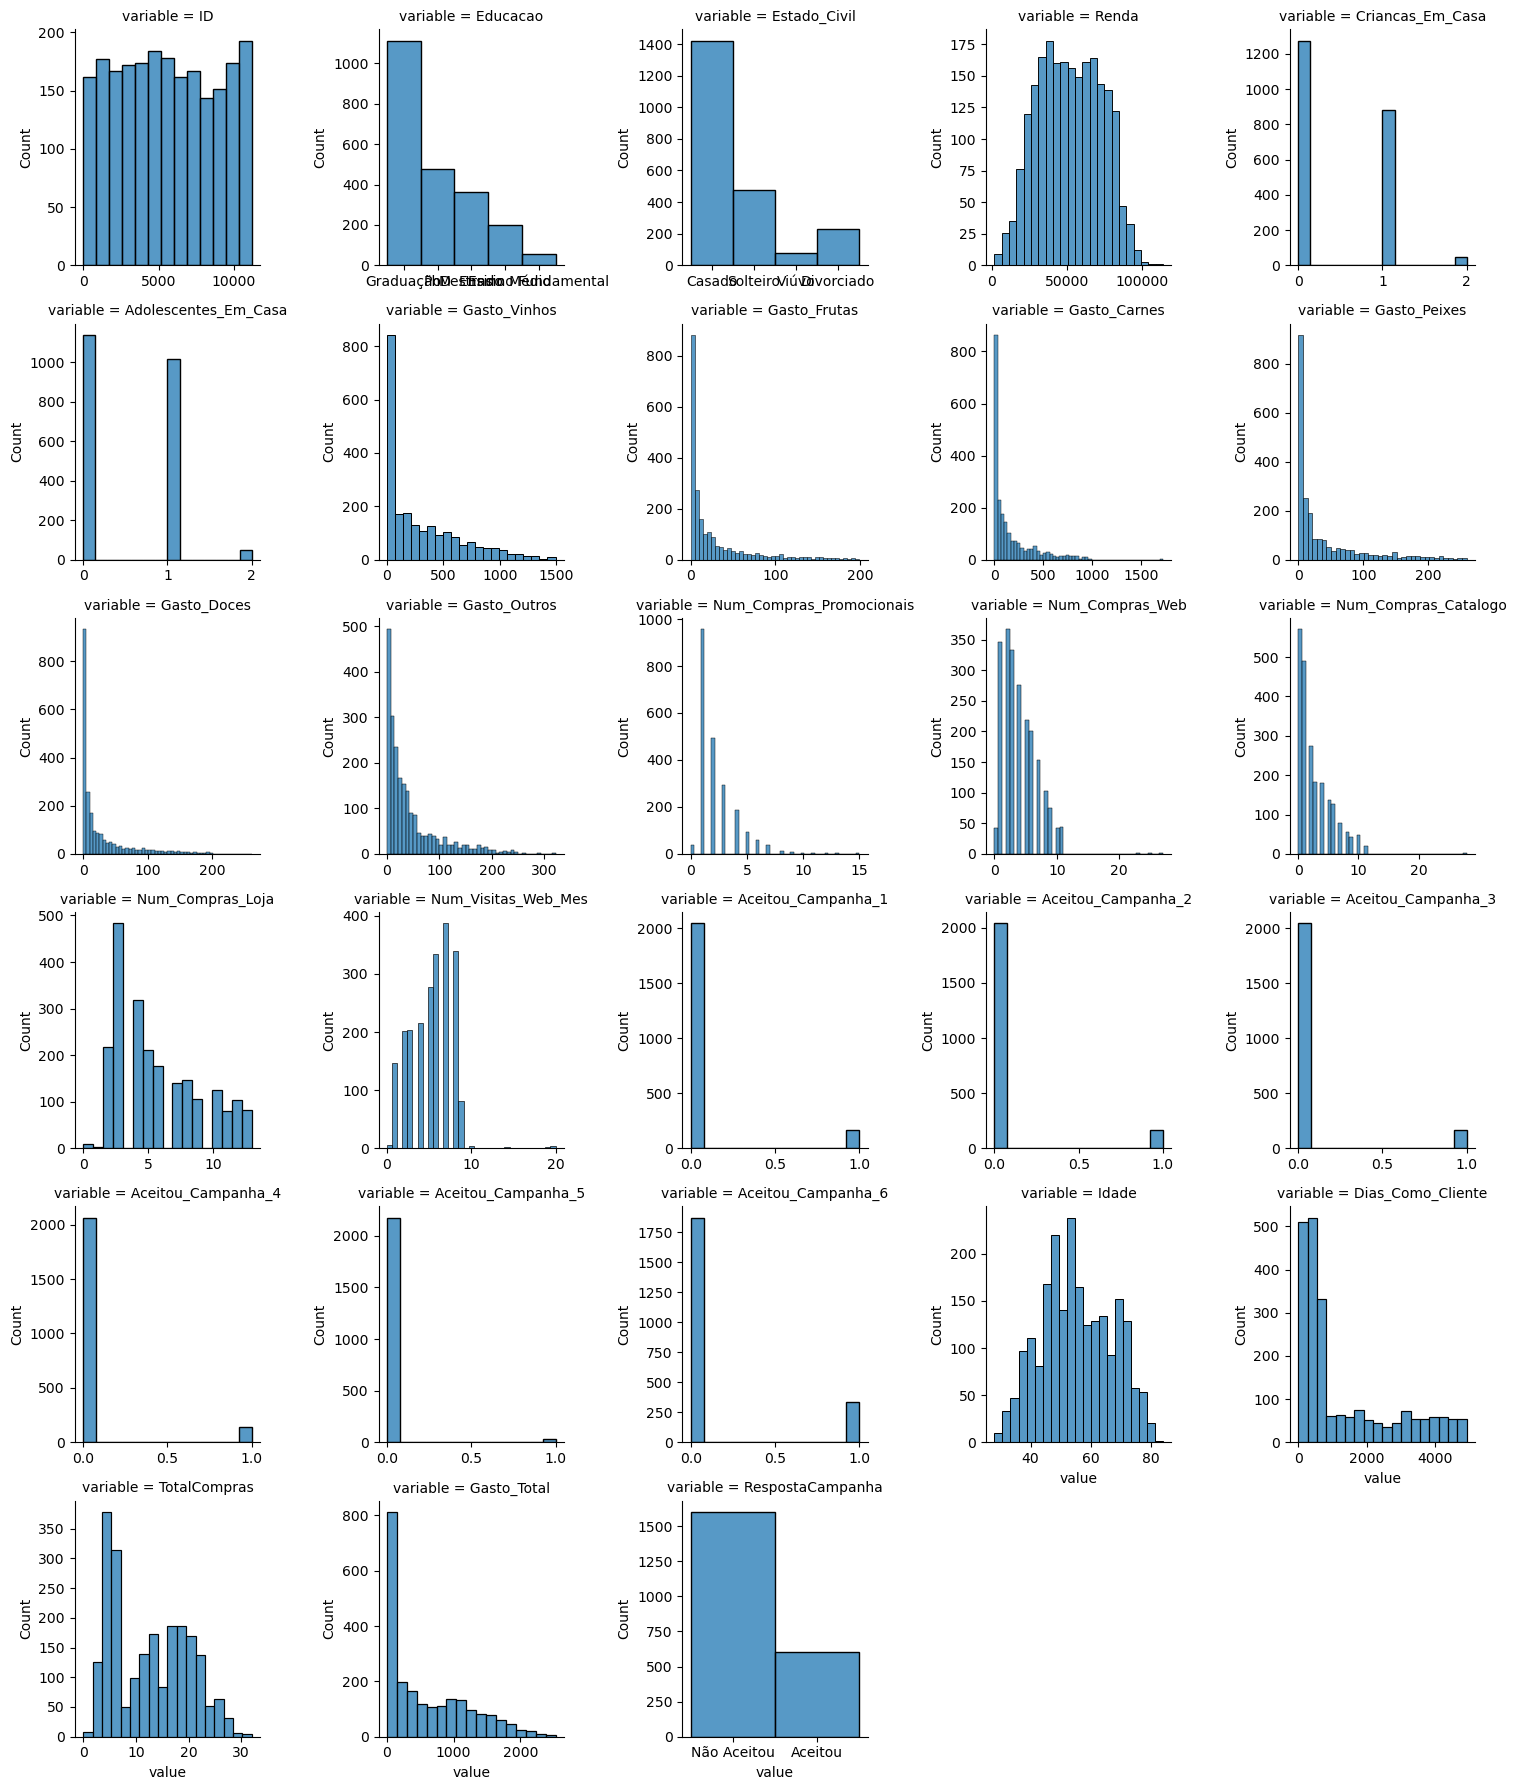

In [64]:
# Distribuição das Variáveis
hist = pd.melt(df_dsa, value_vars = df_dsa )
hist = sns.FacetGrid (hist, col = 'variable', col_wrap = 5, sharex = False, sharey = False)
hist.map(sns.histplot, 'value')

### Qual a Proporção de Clientes Que Aceitaram/Não Aceitaram Campanha de Marketing?

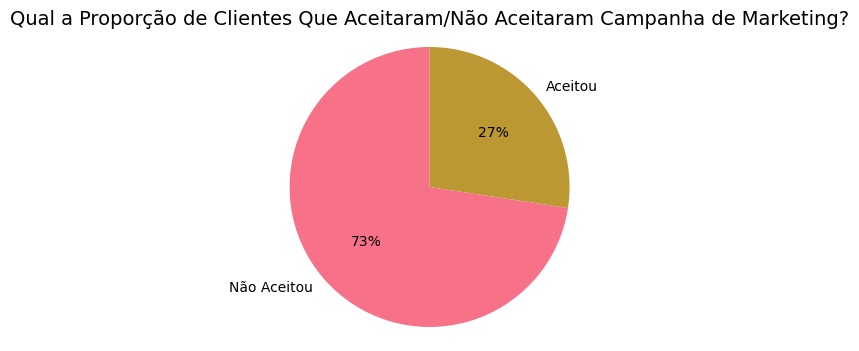

In [65]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (6, 4))

# Conta as ocorrências de cada resposta
counts = df_dsa['RespostaCampanha'].value_counts()
labels = counts.index.tolist()

# Paleta de cores
colors = sns.color_palette('husl')

# Pie chart
ax.pie(counts, labels = labels, colors = colors, autopct = '%.0f%%', startangle = 90)

# Título
ax.set_title('Qual a Proporção de Clientes Que Aceitaram/Não Aceitaram Campanha de Marketing?', fontsize = 14)

# Mantém os eixos iguais
ax.axis('equal')

# Display 
plt.show()

### Qual a Taxa de Sucesso de Cada Uma das 6 Campanhas?

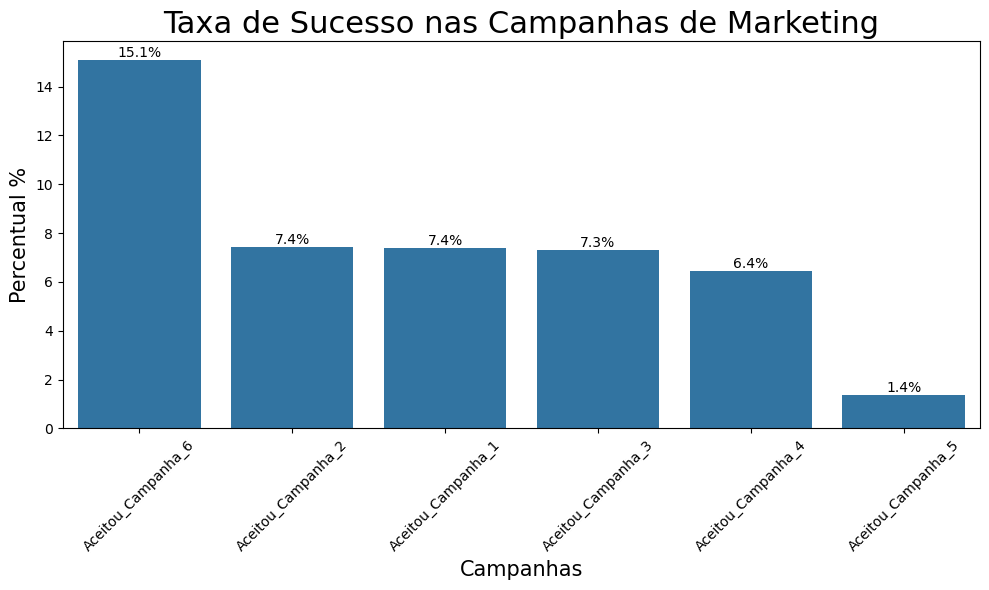

In [66]:
# Lista de campanhas
Campanhas = ['Aceitou_Campanha_1', 
             'Aceitou_Campanha_2', 
             'Aceitou_Campanha_3', 
             'Aceitou_Campanha_4', 
             'Aceitou_Campanha_5', 
             'Aceitou_Campanha_6']

# Calcula o percentual
campaigns = pd.DataFrame(df_dsa[Campanhas].mean() * 100, columns = ['Percent']).reset_index()

# Plot
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'index', y = 'Percent', data = campaigns.sort_values('Percent', ascending = False))

# Labels
plt.xlabel('Campanhas', size=15)
plt.ylabel('Percentual %', size=15)
plt.title('Taxa de Sucesso nas Campanhas de Marketing', size = 22)

# Inclui o percentual no gráfico
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, 
                 p.get_height()), 
                ha = 'center', 
                va = 'bottom')

# Inclina os rótulos no eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

# Display 
plt.tight_layout()
plt.show()

### A Idade Tem Influência nas Decisões de Gastos dos Clientes?

In [67]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2205 non-null   int64  
 1   Educacao                  2205 non-null   object 
 2   Estado_Civil              2205 non-null   object 
 3   Renda                     2205 non-null   float64
 4   Criancas_Em_Casa          2205 non-null   int64  
 5   Adolescentes_Em_Casa      2205 non-null   int64  
 6   Gasto_Vinhos              2205 non-null   int64  
 7   Gasto_Frutas              2205 non-null   int64  
 8   Gasto_Carnes              2205 non-null   int64  
 9   Gasto_Peixes              2205 non-null   int64  
 10  Gasto_Doces               2205 non-null   int64  
 11  Gasto_Outros              2205 non-null   int64  
 12  Num_Compras_Promocionais  2205 non-null   int64  
 13  Num_Compras_Web           2205 non-null   int64  
 14  Num_Compras_C

In [68]:
# Filtra as colunas categóricas e calcula a correlação das colunas quantitativas
df_dsa_corr = df_dsa.drop(['ID',
                           'Educacao',
                           'Estado_Civil',
                           'Criancas_Em_Casa',
                           'Adolescentes_Em_Casa', 
                           'Aceitou_Campanha_1', 
                           'Aceitou_Campanha_2',
                           'Aceitou_Campanha_3', 
                           'Aceitou_Campanha_4', 
                           'Aceitou_Campanha_5',
                           'Aceitou_Campanha_6', 
                           'Educacao',
                           'RespostaCampanha'], axis = 1).corr()

In [69]:
column_corr = df_dsa_corr.loc['Idade']

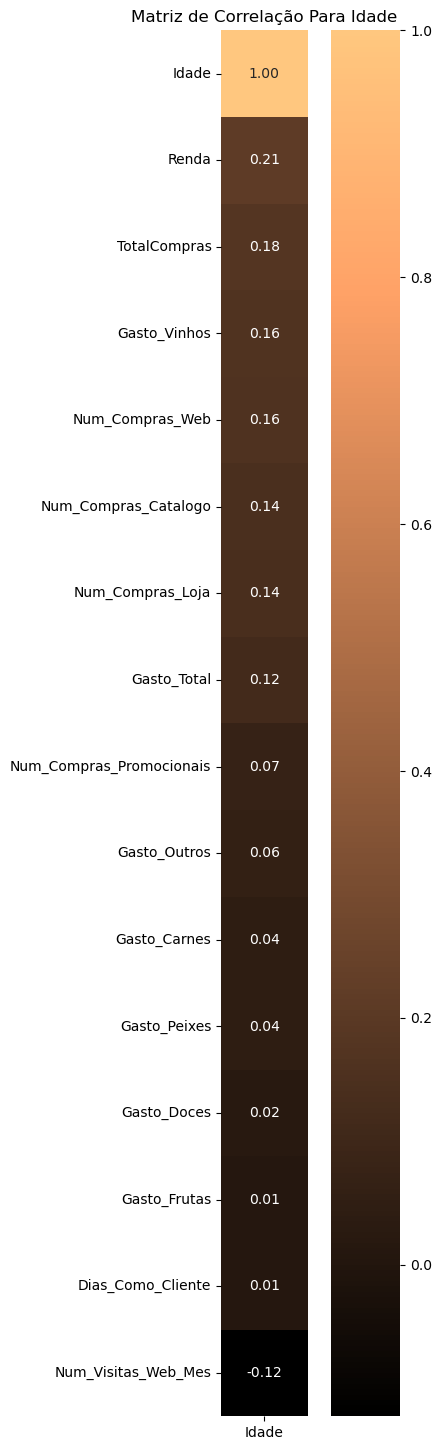

In [70]:
# Plot
plt.figure(figsize = (6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending = False)), 
            annot = True, 
            cmap = 'copper', 
            cbar = True,
            square = True,
            fmt = '.2f')
plt.title('Matriz de Correlação Para Idade')
plt.show()

### Qual a Relação Entre Gasto Total e Resposta às Campanhas de Marketing?

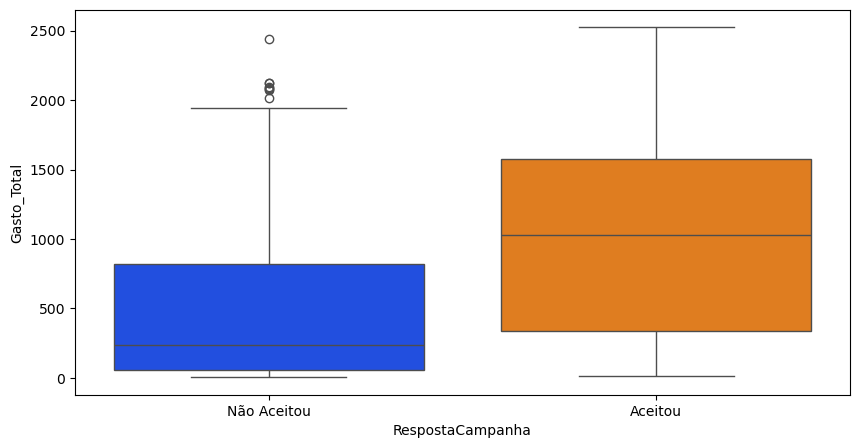

In [71]:
# Plot
plt.figure(figsize = (10,5))
sns.boxplot(x = 'RespostaCampanha', y = 'Gasto_Total', data = df_dsa, palette = 'bright');

### Em Qual Categoria de Produto os Clientes Têm Maior Gasto?

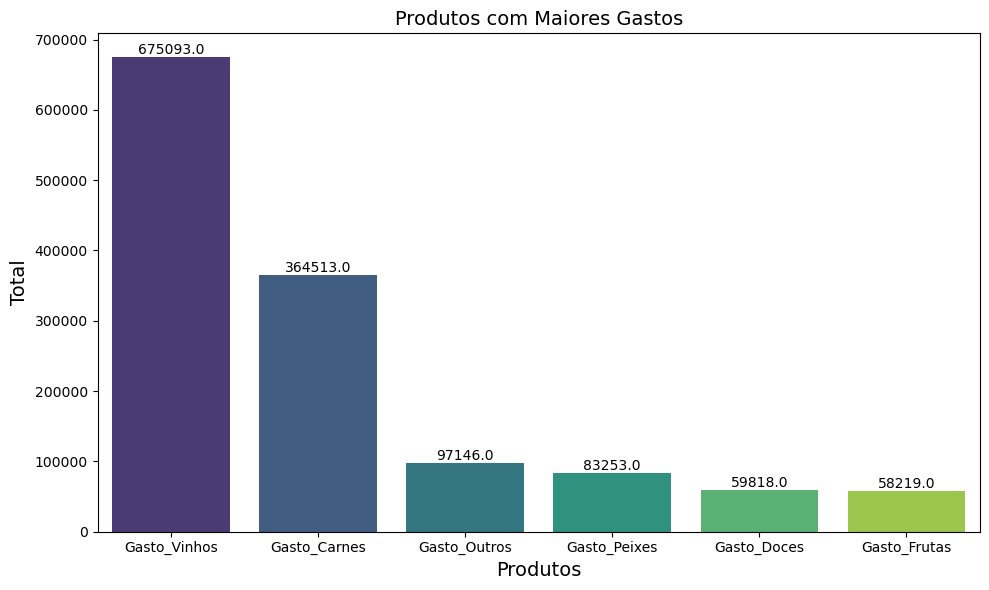

In [72]:
# Categorias de produtos
produtos = ['Gasto_Vinhos', 
            'Gasto_Frutas',
            'Gasto_Carnes', 
            'Gasto_Peixes',
            'Gasto_Doces',
            'Gasto_Outros']

# Cria o dataframe com os totais
df_produtos = pd.DataFrame(df_dsa[produtos].sum(), columns = ['Sum']).reset_index()

# Plot
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'index', 
                 y = 'Sum', 
                 data = df_produtos.sort_values('Sum', ascending = False), 
                 palette = 'viridis')

# Labels
plt.xlabel('Produtos', size = 14)
plt.ylabel('Total', size = 14)
plt.title('Produtos com Maiores Gastos', size = 14)

# Inclui os valores no gráfico
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'bottom')

# Display 
plt.tight_layout()
plt.show()

### Qual a Relação Entre Gasto com Vinho e Resposta às Campanhas de Marketing?

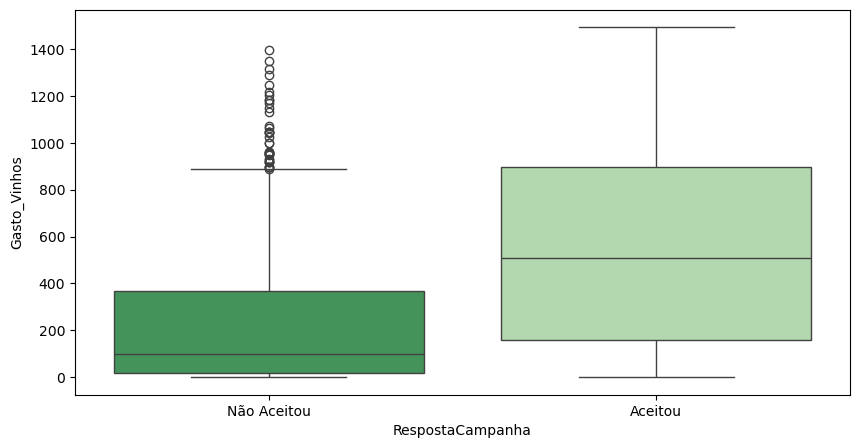

In [73]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'RespostaCampanha', y = 'Gasto_Vinhos', data = df_dsa, palette = 'Greens_r');

### Qual a Relação Entre Renda e Resposta às Campanhas de Marketing?

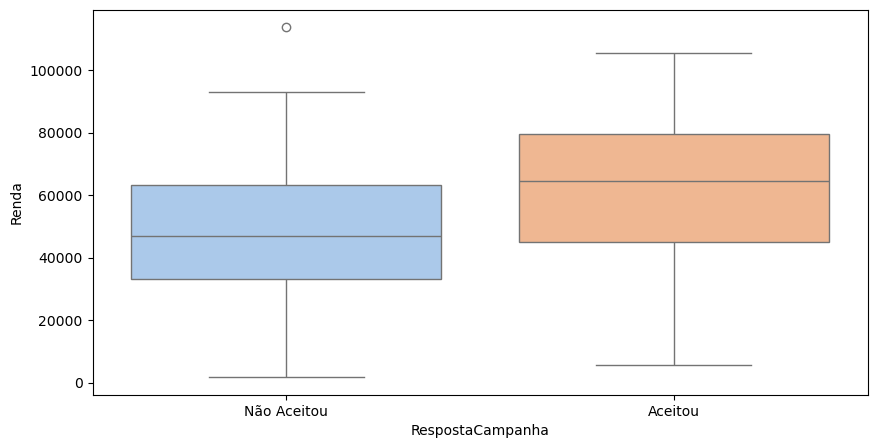

In [74]:
# Plot
plt.figure(figsize = (10,5))
sns.boxplot(x = 'RespostaCampanha', y = 'Renda', data = df_dsa, palette = 'pastel');

### Qual a Relação Entre Renda e Gasto Total?

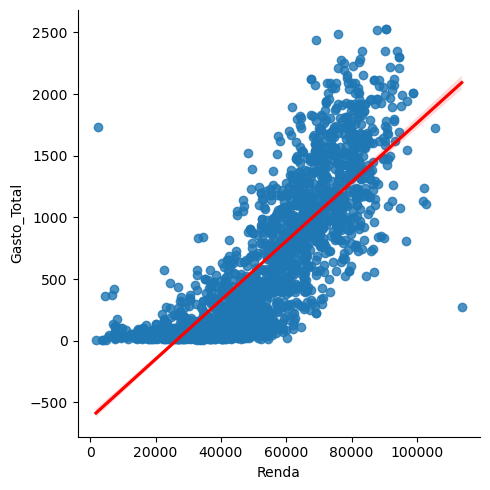

In [75]:
# Plot
sns.lmplot(x = 'Renda', y = 'Gasto_Total', data = df_dsa, palette = 'blue', line_kws = {'color': 'red'})

### Quais Fatores São Mais Importantes Para Explicar a Decisão do Cliente em Aceitar ou Não a Campanha?

In [76]:
df_dsa.head()

ID   Educacao Estado_Civil    Renda  Criancas_Em_Casa  \
0   9970  Graduação       Casado  55375.0                 0   
1   4002        PhD       Casado  77037.0                 0   
2  10914  Graduação     Solteiro  24163.0                 1   
3   7279        PhD       Casado  69476.0                 0   
4  10582  Graduação       Casado  72063.0                 0   

   Adolescentes_Em_Casa  Gasto_Vinhos  Gasto_Frutas  Gasto_Carnes  \
0                     1            42            11            57   
1                     1           463            96           333   
2                     1             4             1             7   
3                     0           260            86           559   
4                     1           180            32           348   

   Gasto_Peixes  ...  Aceitou_Campanha_2  Aceitou_Campanha_3  \
0            10  ...                   0                   0   
1           168  ...                   0                   0   
2             2  ...                   0                   0   
3            63  ...                   0                   0   
4            76  ...                   0                   0   

   Aceitou_Campanha_4  Aceitou_Campanha_5  Aceitou_Campanha_6  Idade  \
0                   0                   0                   0     47   
1                   0                   0                   0     64   
2                   0                   0                   0     54   
3                   0                   0                   0     55   
4                   0                   0                   0     45   

   Dias_Como_Cliente  TotalCompras  Gasto_Total  RespostaCampanha  
0                255             8          162       Não Aceitou  
1                259            26         1123       Não Aceitou  
2               1294             4           17       Não Aceitou  
3                272            14         1044       Não Aceitou  
4               2665            19          758       Não Aceitou  

[5 rows x 28 columns]

In [77]:
# Converte as variáveis do tipo texto em representação numérica usando One-Hot Encoding
df_dsa_imp = pd.get_dummies(df_dsa, columns = ['Educacao', 'Estado_Civil'])

In [78]:
df_dsa_imp.columns

Index(['ID', 'Renda', 'Criancas_Em_Casa', 'Adolescentes_Em_Casa',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Idade', 'Dias_Como_Cliente', 'TotalCompras',
       'Gasto_Total', 'RespostaCampanha', 'Educacao_Ensino Fundamental',
       'Educacao_Ensino Médio', 'Educacao_Graduação', 'Educacao_Mestrado',
       'Educacao_PhD', 'Estado_Civil_Casado', 'Estado_Civil_Divorciado',
       'Estado_Civil_Solteiro', 'Estado_Civil_Viúvo'],
      dtype='object')

In [79]:
df_dsa_imp.head()

ID    Renda  Criancas_Em_Casa  Adolescentes_Em_Casa  Gasto_Vinhos  \
0   9970  55375.0                 0                     1            42   
1   4002  77037.0                 0                     1           463   
2  10914  24163.0                 1                     1             4   
3   7279  69476.0                 0                     0           260   
4  10582  72063.0                 0                     1           180   

   Gasto_Frutas  Gasto_Carnes  Gasto_Peixes  Gasto_Doces  Gasto_Outros  ...  \
0            11            57            10           28            14  ...   
1            96           333           168           53            10  ...   
2             1             7             2            1             2  ...   
3            86           559            63            9            67  ...   
4            32           348            76           32            90  ...   

   RespostaCampanha  Educacao_Ensino Fundamental  Educacao_Ensino Médio  \
0       Não Aceitou                        False                  False   
1       Não Aceitou                        False                  False   
2       Não Aceitou                        False                  False   
3       Não Aceitou                        False                  False   
4       Não Aceitou                        False                  False   

   Educacao_Graduação  Educacao_Mestrado  Educacao_PhD  Estado_Civil_Casado  \
0                True              False         False                 True   
1               False              False          True                 True   
2                True              False         False                False   
3               False              False          True                 True   
4                True              False         False                 True   

   Estado_Civil_Divorciado  Estado_Civil_Solteiro  Estado_Civil_Viúvo  
0                    False                  False               False  
1                    False                  False               False  
2                    False                   True               False  
3                    False                  False               False  
4                    False                  False               False  

[5 rows x 35 columns]

In [80]:
# Vamos remover variáveis que seriam redundantes ou desnecessárias
# Como estamos criando X (dados de entrada) removemos RespostaCampanha (dados de saída)
X = df_dsa_imp.drop(['ID',
                     'Gasto_Vinhos', 
                     'Gasto_Frutas', 
                     'Gasto_Carnes', 
                     'Gasto_Peixes',
                     'Gasto_Doces', 
                     'Gasto_Outros',
                     'Num_Compras_Web', 
                     'Num_Compras_Catalogo', 
                     'Num_Compras_Loja',
                     'Aceitou_Campanha_1', 
                     'Aceitou_Campanha_2', 
                     'Aceitou_Campanha_3', 
                     'Aceitou_Campanha_4', 
                     'Aceitou_Campanha_5', 
                     'Aceitou_Campanha_6',
                     'RespostaCampanha'], axis = 1)

In [81]:
# Converte a variável em representação numérica
y = df_dsa_imp['RespostaCampanha'].map({'Não Aceitou': 0, 'Aceitou': 1})

In [82]:
# Cria o modelo
modelo_rf = RandomForestClassifier(random_state = 43)      

In [83]:
# Treina o modelo
modelo_dsa = modelo_rf.fit(X,y)

In [84]:
# Extrai a importância de cada variável
importances = modelo_dsa.feature_importances_

In [85]:
# Desvio padrão das importâncias das características (feature importances) 
std = np.std([tree.feature_importances_ for tree in modelo_dsa.estimators_], axis = 0)

In [86]:
# Índices
indices = np.argsort(importances)

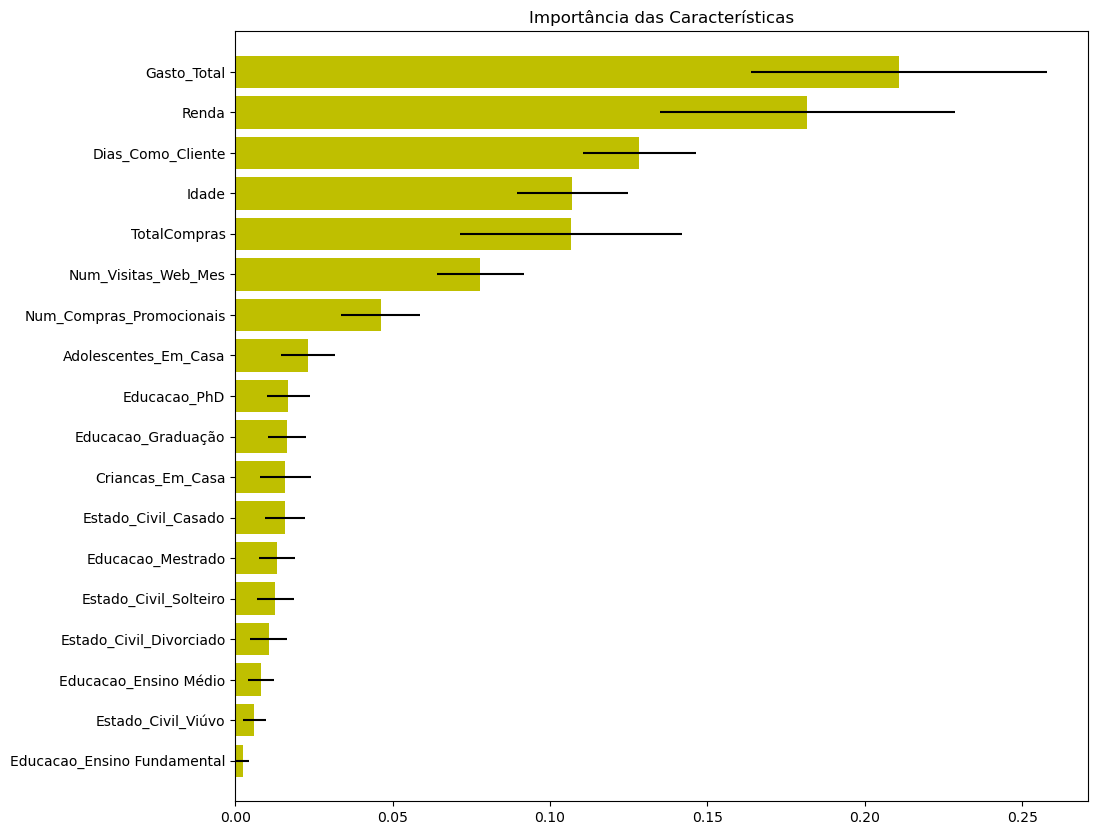

In [87]:
# Plot
plt.figure(1, figsize = (11, 10))
plt.title("Importância das Características")
plt.barh(range(X.shape[1]), importances[indices], color = "y", xerr = std[indices], align = "center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.ylim([-1, X.shape[1]])
plt.show()

## Teste de Hipóteses

Nível educacional não parece ser relevante para explicar a resposta do cliente à campanha de Marketing. Por outro lado, Renda é bastante relevante. É provável que a média de renda seja diferente entre os níveis educacionais.

Vamos testar a hipótese de que existe diferença significativa entre as médias de Renda dos clientes Com Ensino Superior e Sem Ensino Superior. Antes, vamos explorar essa relação.

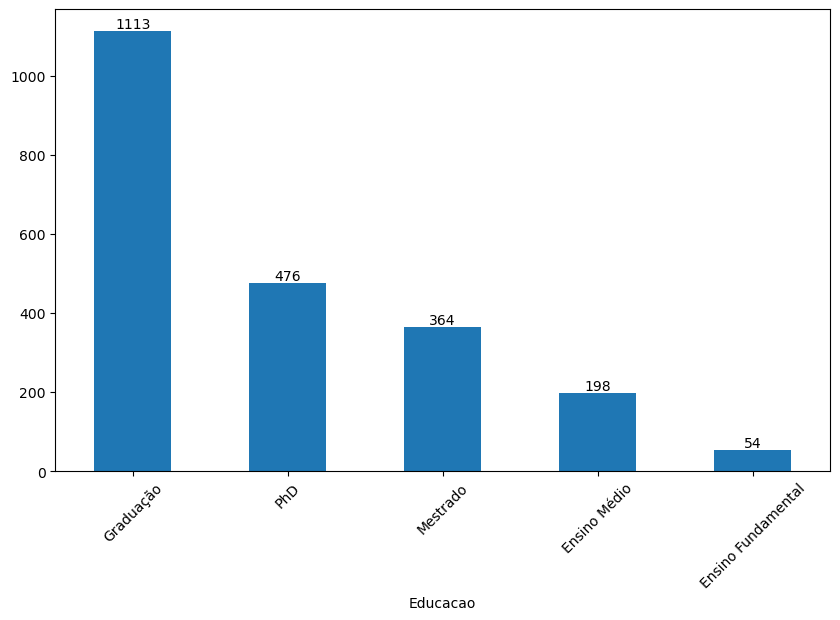

In [88]:
# Plot do total de clientes por nível educacional
plt.figure(figsize = (10, 6))
ax = df_dsa.Educacao.value_counts().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.bar_label(ax.containers[0])
plt.show;

In [89]:
df_dsa.columns

Index(['ID', 'Educacao', 'Estado_Civil', 'Renda', 'Criancas_Em_Casa',
       'Adolescentes_Em_Casa', 'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes',
       'Gasto_Peixes', 'Gasto_Doces', 'Gasto_Outros',
       'Num_Compras_Promocionais', 'Num_Compras_Web', 'Num_Compras_Catalogo',
       'Num_Compras_Loja', 'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1',
       'Aceitou_Campanha_2', 'Aceitou_Campanha_3', 'Aceitou_Campanha_4',
       'Aceitou_Campanha_5', 'Aceitou_Campanha_6', 'Idade',
       'Dias_Como_Cliente', 'TotalCompras', 'Gasto_Total', 'RespostaCampanha'],
      dtype='object')

> Média de Renda Por Nível Educacional 

In [90]:
# Calcula a média
media_renda = df_dsa.groupby('Educacao')['Renda'].mean().reset_index()
media_renda = media_renda.sort_values(by = 'Renda')

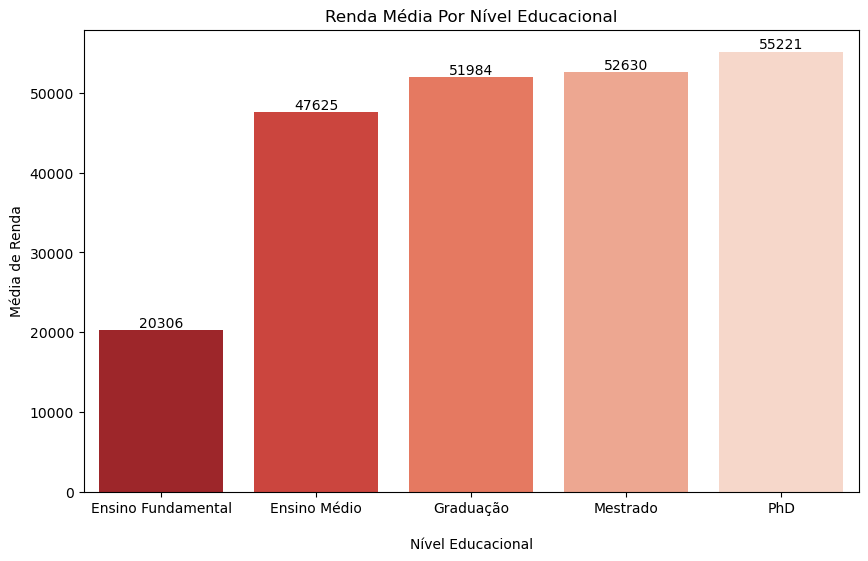

In [91]:
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = media_renda['Educacao'], y = media_renda['Renda'], data = df_dsa, palette = 'Reds_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', 
                va = 'bottom')
plt.xlabel('\nNível Educacional')
plt.ylabel('Média de Renda')
plt.title('Renda Média Por Nível Educacional')
plt.show()

### Definindo as Hipóteses

Para escolher o Teste de Hipóteses precisamos verificar se as variáveis seguem ou não uma distribuição normal. Se as variáveis seguirem uma distribuição normal podemos usar um teste paramétrico. Caso contrário, devemos usar um teste não paramétrico.

**Hipótese Nula (H0)**: A hipótese nula é uma declaração de "não diferença". Em nosso caso, ela afirma que "Não há diferença significativa nas médias de renda de grupos com e sem nível superior". Isso significa que qualquer diferença observada nos dados entre os grupos pode ser atribuída ao acaso.

**Hipótese Alternativa (H1)**: A hipótese alternativa contrapõe a hipótese nula. Ela afirma que "Há uma diferença significativa nas médias de renda de grupos com e sem nível superior". Isso implica que as diferenças observadas são reais e não apenas resultado de variações aleatórias.

Quando você realiza um teste estatístico (como um teste t de Student para amostras independentes ou um teste não paramétrico como o Mann-Whitney U se as suposições do teste t não são atendidas), você está testando essas hipóteses. O resultado do teste (em especial, o valor-p) indica se você deve ou não rejeitar a hipótese nula:

**Valor-p Baixo (tipicamente < 0,05)**: Se o valor-p do teste for menor que o nível de significância escolhido (geralmente 0,05), você rejeita a hipótese nula, sugerindo que há evidências suficientes para afirmar que existe uma diferença significativa nas médias de renda entre os grupos.

**Valor-p Alto**: Se o valor-p for maior que o nível de significância, você não rejeita a hipótese nula, indicando que não há evidências suficientes para afirmar que existe uma diferença significativa.

É importante lembrar que "não rejeitar a hipótese nula" não é o mesmo que provar que a hipótese nula é verdadeira. Significa apenas que, com os dados disponíveis, não há evidências suficientes para apoiar a hipótese alternativa.

In [92]:
# Representação numérica da variável categórica
df_dsa['Educacao'] = df_dsa['Educacao'].map({'Ensino Fundamental':1,
                                             'Ensino Médio':2,
                                             'Graduação':3,
                                             'Mestrado':4,
                                             'PhD':5})

In [93]:
df_dsa.head()

ID  Educacao Estado_Civil    Renda  Criancas_Em_Casa  \
0   9970         3       Casado  55375.0                 0   
1   4002         5       Casado  77037.0                 0   
2  10914         3     Solteiro  24163.0                 1   
3   7279         5       Casado  69476.0                 0   
4  10582         3       Casado  72063.0                 0   

   Adolescentes_Em_Casa  Gasto_Vinhos  Gasto_Frutas  Gasto_Carnes  \
0                     1            42            11            57   
1                     1           463            96           333   
2                     1             4             1             7   
3                     0           260            86           559   
4                     1           180            32           348   

   Gasto_Peixes  ...  Aceitou_Campanha_2  Aceitou_Campanha_3  \
0            10  ...                   0                   0   
1           168  ...                   0                   0   
2             2  ...                   0                   0   
3            63  ...                   0                   0   
4            76  ...                   0                   0   

   Aceitou_Campanha_4  Aceitou_Campanha_5  Aceitou_Campanha_6  Idade  \
0                   0                   0                   0     47   
1                   0                   0                   0     64   
2                   0                   0                   0     54   
3                   0                   0                   0     55   
4                   0                   0                   0     45   

   Dias_Como_Cliente  TotalCompras  Gasto_Total  RespostaCampanha  
0                255             8          162       Não Aceitou  
1                259            26         1123       Não Aceitou  
2               1294             4           17       Não Aceitou  
3                272            14         1044       Não Aceitou  
4               2665            19          758       Não Aceitou  

[5 rows x 28 columns]

In [94]:
# Dados que serão testados
dados_para_testar = df_dsa[['Renda', 'Educacao']]

In [95]:
dados_para_testar.head()

Renda  Educacao
0  55375.0         3
1  77037.0         5
2  24163.0         3
3  69476.0         5
4  72063.0         3

### Aplicando o Teste de Normalidade Para Selecionar o Teste de Hipóteses Adequado

O Teste de Shapiro-Wilk é um teste estatístico usado para avaliar a normalidade de uma distribuição de dados. Este teste é especialmente útil para amostras pequenas (geralmente, menos de 50 observações), embora também possa ser aplicado a conjuntos de dados maiores. As hipóteses para o Teste de Shapiro-Wilk são formuladas da seguinte forma:

**Hipótese Nula (H0)**: A hipótese nula do Teste de Shapiro-Wilk afirma que os dados seguem uma distribuição normal. Em outras palavras, assume-se que a distribuição da amostra em questão não difere significativamente de uma distribuição normal teórica.

**Hipótese Alternativa (H1)**: A hipótese alternativa é que os dados não seguem uma distribuição normal. Isso significa que há evidências suficientes nos dados para sugerir que a distribuição se desvia da normalidade.

Ao realizar o Teste de Shapiro-Wilk, você calcula um valor-p que indica a probabilidade de obter a amostra observada (ou uma mais extrema) assumindo que a hipótese nula seja verdadeira.

Se o valor-p for baixo (geralmente, menor que o nível de significância escolhido, como 0,05), você rejeita a hipótese nula, sugerindo que os dados não vêm de uma distribuição normal.

Se o valor-p for alto, você não rejeita a hipótese nula, o que indica que não há evidências suficientes para afirmar que os dados não seguem uma distribuição normal.

É importante notar que o Teste de Shapiro-Wilk, como outros testes de normalidade, pode ser sensível ao tamanho da amostra. Com amostras muito grandes, o teste pode detectar pequenos desvios da normalidade que podem não ser relevantes na prática. Por outro lado, em amostras muito pequenas, o teste pode não ter poder suficiente para detectar desvios significativos da normalidade.

In [96]:
# Teste Shapiro-Wilk 
def dsa_testa_normal(columns):
    
    for column in columns:
        
        statistic, p_value = shapiro(dados_para_testar[column])

        alpha = 0.05
        
        if p_value < alpha:
             print(f'\n{column}: Alpha {alpha} < valor-p {p_value:.2f} - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.')
        else:
             print(f'\n{column}: Alpha {alpha} > valor-p {p_value:.2f} - Falhamos em Rejeitar a H0 do Teste Shapiro-Wilk: Os dados seguem uma distribuição normal.')

In [97]:
dsa_testa_normal(dados_para_testar)


Renda: Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.

Educacao: Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.


### Aplicando Teste de Hipóteses Não Paramétrico

O teste de Mann-Whitney U é uma técnica estatística usada para comparar diferenças entre dois grupos independentes quando os dados não seguem necessariamente uma distribuição normal. Este teste é uma alternativa não paramétrica ao teste t de Student para amostras independentes e é frequentemente usado quando as condições para o teste t não são atendidas (por exemplo, quando a distribuição dos dados é significativamente não normal).

In [98]:
# Criando os grupos
grupo_com_graduacao = df_dsa[df_dsa['Educacao'].isin([5, 4, 3])]['Renda']
grupo_sem_graduacao = df_dsa[df_dsa['Educacao'].isin([1, 2])]['Renda']

In [99]:
# Teste Mann-Whitney U 
statistic, p_value = mannwhitneyu(grupo_com_graduacao, grupo_sem_graduacao)

# Nível de significância
alpha = 0.05

# Resultado
if p_value < alpha:
    print("Rejeitamos a hipótese nula: Há uma diferença significativa nas médias de renda.")
else:
    print("Falhamos em rejeitar a hipótese nula: Não há diferença significativa nas médias de renda.")

Rejeitamos a hipótese nula: Há uma diferença significativa nas médias de renda.


## Conclusão

Os fatores mais relevantes que explicam a resposta dos clientes às campanhas de Marketing são o histórico de gasto total, a renda, o tempo total como cliente, idade e total de compras anteriores. Ou seja, clientes fiéis estão mais propensos a aceitar campanhas de Marketing.

O nível educacional e o estado civil não parecem ser fatores relevantes para explicar a resposta à campanha de Marketing. Decidimos então aplicar um teste de hipóteses.

Ao testar a hipótese que existe diferença significativa entre as médias de renda de clientes com ou sem graduação, ficou evidente que existe diferença. Vimos ainda que níveis educacionais mais altos têm média de renda maior.

Logo, a empresa deveria segmentar suas campanhas de Marketing para os diferentes públicos e direcionar as campanhas com base na renda e no nível educacional, considerando ainda histórico de gasto total, o tempo total como cliente, idade e total de compras anteriores.

# Fim